In [1]:
import torch

In [2]:
!kaggle datasets download -d uciml/iris
!unzip iris.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 7.10MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [23]:
import pandas as pd

df = pd.read_csv('Iris.csv', header=0)[['PetalLengthCm', 'Species']]

filtered_data = df[df['Species'].isin(['Iris-setosa',['Iris-versicolor']])]

filtered_data.loc[:, 'Species'] = filtered_data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1})

x = filtered_data['PetalLengthCm'].values.reshape(-1, 1)
y = filtered_data['Species'].values.astype(int)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

from torch.utils.data import Dataset, DataLoader

class IrisDataset(Dataset):
  def __init__(self, features, label):
    self.feature = features
    self.label = label

  def __len__(self):
    return len(self.feature)

  def __getitem__(self, idx):
    return self.feature[idx], self.label[idx]


train_dataset = IrisDataset(x_train, y_train)
test_dataset = IrisDataset(x_test, y_test)

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [24]:
x

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4]])

In [25]:
x_train

tensor([[-0.3502],
        [-0.3502],
        [ 0.2101],
        [-0.3502],
        [ 0.2101],
        [-0.3502],
        [-0.9106],
        [ 0.7705],
        [-0.3502],
        [ 0.2101],
        [ 0.2101],
        [-0.9106],
        [ 2.4517],
        [ 0.2101],
        [ 0.2101],
        [-0.3502],
        [ 2.4517],
        [ 0.2101],
        [-0.3502],
        [ 1.3309],
        [ 0.7705],
        [ 0.7705],
        [-0.9106],
        [-0.3502],
        [ 0.2101],
        [-0.9106],
        [ 0.7705],
        [-1.4710],
        [ 1.3309],
        [-0.9106],
        [ 0.2101],
        [-2.5918],
        [ 1.3309],
        [-0.3502],
        [ 1.3309],
        [ 0.2101],
        [-0.9106],
        [-1.4710],
        [-0.3502],
        [-0.9106]])

In [26]:
x_test

tensor([[-2.0314],
        [ 0.2101],
        [ 0.7705],
        [-0.3502],
        [-0.3502],
        [ 0.2101],
        [ 0.7705],
        [ 0.7705],
        [ 0.2101],
        [ 0.2101]])

In [12]:
df

,PetalLengthCm,Species
0,1.4,Iris-setosa
1,1.4,Iris-setosa
2,1.3,Iris-setosa
3,1.5,Iris-setosa
4,1.4,Iris-setosa
...,...,...
145,5.2,Iris-virginica
146,5.0,Iris-virginica
147,5.2,Iris-virginica
148,5.4,Iris-virginica


In [27]:
import torch.nn as nn

class BinaryClassificationModel(nn.Module):
  def __init__(self):
    super(BinaryClassificationModel, self).__init__()
    self.layer_1 = nn.Linear(1, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    t = self.layer_1(x)
    y = self.sigmoid(t)
    return y

model = BinaryClassificationModel()

In [28]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [29]:
num_epochs = 500
loss_list = []

for epoch in range(num_epochs):
  model.train()
  epoch_loss=0
  for batch_features, batch_labels in train_loader:
    optimizer.zero_grad()
    outputs = model(batch_features)
    loss = criterion(outputs, batch_labels)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
  loss_list.append(epoch_loss)

  if (epoch+1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [100/500], Loss: 0.8075
Epoch [200/500], Loss: 0.4843
Epoch [300/500], Loss: 0.3384
Epoch [400/500], Loss: 0.2593
Epoch [500/500], Loss: 0.2091


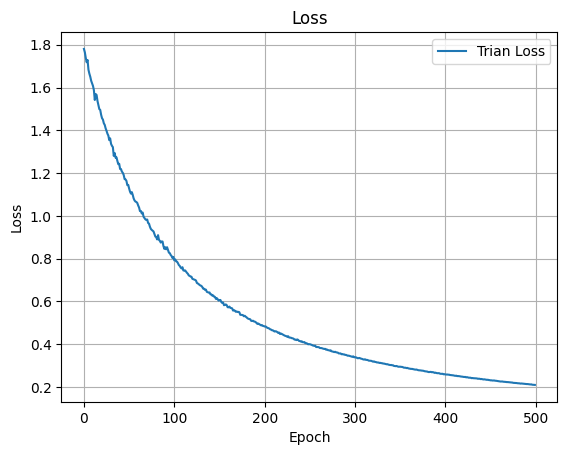

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_list, label='Trian Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.title('Loss')
plt.show()

In [37]:
x_test

tensor([[-2.0314],
        [ 0.2101],
        [ 0.7705],
        [-0.3502],
        [-0.3502],
        [ 0.2101],
        [ 0.7705],
        [ 0.7705],
        [ 0.2101],
        [ 0.2101]])

In [40]:
model.eval()

with torch.no_grad():
  predictions = model(x_test)
  predicted_labels = (predictions>=0.5).float()

actual_labels = y_test.numpy()
predicted_labels = predicted_labels.numpy()

print(actual_labels.flatten())
print(predicted_labels.flatten())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


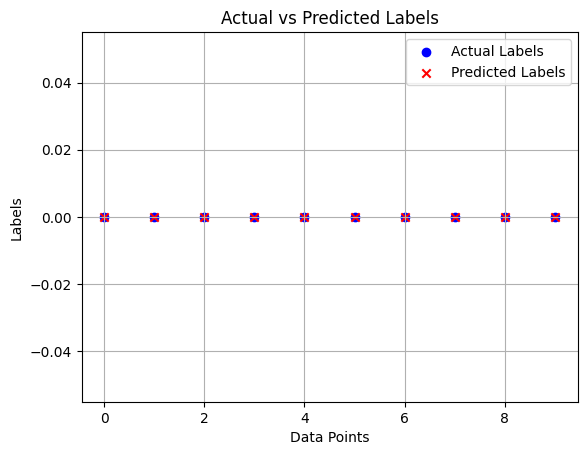

In [36]:
plt.figure()
plt.scatter(range(len(actual_labels)), actual_labels, color='blue', label='Actual Labels')
plt.scatter(range(len(predicted_labels)), predicted_labels, color='red',label='Predicted Labels', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.grid(True)
plt.show()